In [1]:
import sys
import numpy as np
import pandas as pd
import networkx as nx

graph_1_list = []
graph_1_list_node_1 = []
graph_2_list = []
graph_2_list_node_1 = []
graph_3_list = []
graph_3_list_node_1 = []
graph_4_list = []
graph_5_list = []
graph_6_list = []

with open('graph_1.txt','r') as f:
    for line in f:
        graph_1_list.append(list(line.strip('\n').split(',')))
        
with open('graph_1.txt','r') as f:
    for line in f:
        graph_1_list_node_1.append(list(line.strip('\n').split(',')))
    append_list_1 = [['2', '1'], ['1', '3'], ['1', '4'], ['1', '5'], ['1', '6'], ['3', '1'], ['4', '1'], ['5', '1'], ['6', '1']]
    for edge in append_list_1:
        graph_1_list_node_1.append(edge)
with open('graph_2.txt','r') as f:
    for line in f:
        graph_2_list.append(list(line.strip('\n').split(',')))
        
with open('graph_2.txt','r') as f:
    for line in f:
        graph_2_list_node_1.append(list(line.strip('\n').split(',')))
    append_list_2 = [['2', '1'], ['1', '3'], ['1', '4'], ['1', '5'], ['3', '1'], ['4', '1'], ['5', '1']]
    for edge in append_list_2:
        graph_2_list_node_1.append(edge)
with open('graph_3.txt','r') as f:
    for line in f:
        graph_3_list.append(list(line.strip('\n').split(',')))
with open('graph_3.txt','r') as f:
    for line in f:
        graph_3_list_node_1.append(list(line.strip('\n').split(',')))
    append_list_3 = [['1', '3'], ['1', '4'], ['3', '1'], ['4', '1']]
    for edge in append_list_3:
        graph_3_list_node_1.append(edge)
with open('graph_4.txt','r') as f:
    for line in f:
        graph_4_list.append(list(line.strip('\n').split(',')))
with open('graph_5.txt','r') as f:
    for line in f:
        graph_5_list.append(list(line.strip('\n').split(',')))
with open('graph_6.txt','r') as f:
    for line in f:
        graph_6_list.append(list(line.strip('\n').split(',')))


data_txt = np.loadtxt('IBM_testing_dataset.txt')
IBM_testing_txtDF = pd.DataFrame(data_txt)
IBM_data = []

for IBM_item,customer in enumerate(IBM_testing_txtDF[0]):
    if len(IBM_data) < int(customer):
        IBM_data.append(list())
        IBM_data[int(customer)-1].append(str(IBM_testing_txtDF[2][IBM_item]))
    else:
        IBM_data[int(customer)-1].append(str(IBM_testing_txtDF[2][IBM_item]))

In [21]:
len(graph_3_list_node_1)

10

In [2]:
import csv
import pandas as pd
from itertools import combinations
import time

IBM_data =pd.DataFrame(index=range(len(IBM_data)),data=IBM_data)
#Read data from CSV
# data = pd.read_csv('groceries.csv')
data = IBM_data
# data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
#
#Parameters
minsup = 0.045#float(input("Support-Threshold: "))
minsup = minsup * len(data)
minconf = 0.1#float(input("Confidence-Threshold: "))
# print(len(data))#9835
time_start = time.time()

#Add all data in a list of lists
items = []  
# print(len(data.values[0]))#1列(ROW)有32的物品
for i in range(0, len(data)):  #將所有data中的物品一列一列放到items
     items.append([str(data.values[i, j]) for j in range(0, len(data.values[0]))])

#Creating a list of dictionaries
count = [dict() for x in range(len(data.values[0]) + 1)]
# print(items)
# #Count support for each individual items
s = []
for i in items:
    for j in i:      #讀取所有items
        s.append(j)
for i in s:                      #創字典 放在count[1]
    #If item is present in dictionary, increment its count by 1
    if i in count[1]:
        count[1][i] = count[1][i] + 1
    #If item is not present in dictionary, set its count to 1
    else:
        count[1][i] = 1     #{'i':1}

# #Remove infrequent and empty items #去除小於minsup,nan
for i in count[1].copy():
    if(count[1][i] < minsup):
        count[1].pop(i)
# count[1].pop('nan') #去除以key = 'NAN'產生的值
count[1].pop('None') #去除以key = 'NAN'產生的值

# #Storing transactions as lists without infrequent items
a = list(count[1]) #列出所有符合的KEY
item = [list() for i in range(len(data))] #創造len(data) = 9835個list 
c = 0 
for i in range(0,len(items)): ##將所有data中的物品一列一列放到items
    for j in range(len(items[i])):
#         print(items[i][j])
        if(a.__contains__(items[i][j]) != 0): #確認物品是否存在
            item[i].append(items[i][j]) #將物品分成[['a', 'b', 'c'],[]]與itmes不同的地方是裡練已經沒有NAN了

#Function to sort list to support
def sort(a): #a = 所有符合的KEY的list
    for i in range(len(a) - 1):
        for j in range(len(a) - i - 1):
            if(count[1][a[j]] < count[1][a[j + 1]]): #如果下一個比上一個大則互換位子
                a[j],a[j + 1] = a[j + 1],a[j]
                
#Call function to sort all transactions in descending order of their support
for i in range(0,len(data)): #9835
    if(len(item[i]) > 1): #如果不只一個物件就排序他
        sort(item[i])

#Tree class for FP-Tree
class tree: #設計樹根，分支
    def __init__(self, name, sup, parent):
        self.name = name
        self.sup = sup
        self.nodeLink = None
        self.parent = parent
        self.children = []

#Function to check if the node is present is a child of the current node
def ispresent(node,name):    #確認是否有children
    f = -1               
    for i in node.children:
        f += 1
        if(i.name == name):
            return f
    return -1

#HeaderTable which stores the reference of last/first occurence of an item. Used as a linked list to generate candidate trees 
lastocc = count[1].copy() #符合sup的字典
for i in lastocc: #lastocc字典中所有值皆為NONE
    lastocc[i] = None
#Function to create FP-tree
root = tree("root", -1, None)
z = 0
for i in item: #item為沒有NAN的items
    current = root
    for j in range(len(i)): #len(i)9835
        if(ispresent(current,i[j]) >= 0): #第一次通常不符合此情形，直接執行else，看有沒有children
            current = current.children[ispresent(current, i[j])]
            current.sup = current.sup + 1
        else:
            child=tree(i[j], 1, current)    #創建i[j]子根
            current.children.append(child) #將子根放入children =[] 
            t = current #t 記錄柱上一層的tree1
            current = current.children[ispresent(current, i[j])] #現在current.children裡有子根，所以self.name = i[j]如下示意，
            #ispresent(current,i[j])回傳 0 ，現在的current為tree2
            current.parent = t #紀錄上一層tree1
            if(lastocc[current.name] == None):
                lastocc[current.name] = current #創建{'i[j]': tree2-1()} 
            else:#創出第一層並列樹枝
                current.nodeLink = lastocc[current.name] #將tree2-2連結到tree4
                lastocc[current.name] = current #CURRENT = TREE2-2 {'i[j]': tree2-2}
            
# class tree1:
#     def __init__(self, name, sup, parent):
#         self.name = 'root'
#         self.sup = -1
#         self.nodeLink = None
#         self.parent = none
#         self.children = [
#   class tree2-1:
#     def __init__(self, name, sup, parent):      [['A','B','C'],['C','A']]
#         self.name = 'A'
#         self.sup = 1
#         self.nodeLink = NONE
#         self.parent = parent
#         self.children = [
#                                     class tree3:
#                                         def __init__(self, name, sup, parent):
#                                             self.name = 'B'
#                                             self.sup = 1
#                                             self.nodeLink = None
#                                             self.parent = parent
#                                             self.children = [
#                                                                 class tree4:
#                                                                     def __init__(self, name, sup, parent):
#                                                                         self.name = 'B'
#                                                                         self.sup = 1
#                                                                         self.nodeLink = None
#                                                                         self.parent = parent
#                                                                         self.children = []
#                                                                 ]
#         ],
#   class tree2-2:
#     def __init__(self, name, sup, parent):
#         self.name = 'C'
#         self.sup = sup
#         self.nodeLink = TREE 4
#         self.parent = TREE1
#         self.children = []
# ]



#Function to get frequent itemsets with suffix 'node' and length n
def singlepath(node, n):
    c = 0
    sup = node.sup
    path = []
    pathname = []
    current = node
    
    #Get the path from current node to root
    while(current.parent != None): #查看目current是否為'root'，如果是則無parent，重複做直道回到最上層('root')
        path.append(current)     #將current內容紀錄(tree)
        pathname.append(current.name)      #('c')
        current = current.parent  #往上一層移動
    path.remove(node) #除了自己以外的路線
    pathname.remove(node.name) 
    candidatepath = []
    temp_candidatepath = []
   
    #Generate combinations of length n in the path
    a = (list(combinations(pathname, n))) #列出除了自己以外的長度為n的組合
    for j in a:
        temp_candidatepath.append(tuple(sorted(j)))   #以tuple形式存在temp_candidatapath裡
    #Append the suffix 'node.name' to the above paths
    for j in temp_candidatepath:
        j = list(j) #再次變回list
        j.append(node.name) #將原本剔除的當前TREE名加回去 變成包含當前的組合，就是在做freqent pattern
        candidatepath.append(sorted(j)) #在加回去變成 [['a','c'],['b','c']]
    #Update counts of the generated itemsets
    for j in candidatepath:
        j = tuple(j) #j = ('a','c')
        if j in count[n + 1]: #count[1]為符合minsup的字典，n至少會從1開始 
            count[n + 1][j] = count[n + 1][j] + sup  # 將之前已創好的value值，加上當前tree所有的sup
        else:
            count[n + 1][j] = sup #創建新字典,此sup為當前tree存有的sup
            
    #Iterating in the candidate tree recursively 
    if(node.nodeLink != None): #查看是否存在分支
        node=node.nodeLink
        singlepath(node, i) #i為組合長度
    
#Check if itemset is frequent
def frequent(n): #算出現次數
    f=0
    for i in count[n]:
        if(count[n][i] >= minsup):
            f = 1
    if(f == 1):
        return 1
    else:
        return 0

#Call singlepath function for all frequent nodes
for i in range(1, len(data.values[0]) + 1): #1列(ROW)有32的物品, +1是確保有32為一組的組合  #!
    if(frequent(i) == 1):
        for j in lastocc: #開始製造組合，將結果放到count[]裡，count唯有32空字典的list
            singlepath(lastocc[j], i)

#Remove infrequent itemsets
for z in range(len(data.values[0]) + 1):            
    for i in count[z].copy():
            if(count[z][i] < minsup): #查看所有的dict裡面的東西，是否符合minsup
                count[z].pop(i) #去掉不符合的

frequent_pattern = []
for items in count:
    for want in items:
        frequent_pattern.append(want)
                
#Get 'q', the length of the longest itemset
i=1 #設2是因為從第二筆的字典，才開始有東西
while(len(count[i]) != 0): #從這邊就能知道最大符合長度是多長，因為不符合的都被刪掉了，所以count最大的子矩陣
    i = i + 1
q = i - 1

#Find maximal and closed itemsets
maximal = []
closed = []
for i in range(1, q):
    for j in count[i]:
        fm = 0
        fc = 0
        for k in count[i + 1]:
            a = set(list([j]))
            b = set(list(k))
            #Set is maximal if no immediate superset is frequent
            if(a.intersection(b) == a): #如果兩者重疊則maximal
                fm = 1 
                #Set is closed if none of its immediate supersets have equal support
                if(count[i][j] == count[i + 1][k]): #出現次數相同
                    fc = 1
        if(fm == 0):
            maximal.append(j)
        if(fc == 0):
            closed.append(j)
#All sets at the top of the tree are automatically maximal and closed
for i in count[q]:
    maximal.append(i)
    closed.append(i)
    
# print("frequent_pattern")
# print('number of frequent pattern',len(frequent_pattern))
# print(frequent_pattern)
 
#Find Association Rules 
print("Association_Rules")
all_frequent_pattern = {}
for len_FP in count:
    all_frequent_pattern.update(len_FP)

IBM_list = []
def rulegenerator(fitems): #fitmes = 最終dic
    '''
    Generates association rules from the frequent itemsets
    '''
    counter = 0
    
    for itemset in fitems.keys():
        if isinstance(itemset, str): #只有單個得我不要，我要tuple形式('a','b')
            continue
        length = len(itemset)#tuple裡面有幾項
        union_support = fitems[tuple(itemset)]#原本itemset為LIST形式，必須使用tuple(才可以變成key ，看兩個以上的品項的出現次數
        for i in range(1, length):
            lefts = map(list, combinations(itemset, i)) #['mineral water'], ['pancakes']
            for left in lefts:
                if len(left) == 1:
                    if ''.join(left) in fitems:
                        leftcount = fitems[''.join(left)]#單品項出現次數 
                        conf = union_support / leftcount
                y_list = []
                x_list = []
                if conf >= minconf:
                    right = list(itemset[:])
                    sub_list = []
                    for e in left:                          #去除被分配在左邊的品項
                        right.remove(e)     
#                     fo.write(str(left) + ' (' + str(leftcount) + ')' + ' -> ' + str(right) + ' (' + str(fitems[''.join(right)]) + ')' + ' [' + str(conf) + ']' + '\n')
                    
                    
#                     print(str(left) + ' -> ' + str(right) + ' (' + str(conf) + ')')
#                     for y in left:
#                         y_list.append(int(float(y)))
#                     for x in right:
#                         x_list.append(int(float(x)))
                    for y in left:
                        y_list.append(y)
                    for x in right:
                        x_list.append(x)
                    sub_list.append(y_list)
                    sub_list.append(x_list)
                    IBM_list.append(sub_list)
                    counter += 1
#                     fo.close()
    print(counter, "rules generated")

rulegenerator(all_frequent_pattern)






time_end = time.time()
print('FP_Growth_spent_time', time_end - time_start)
# print( time_end - time_start)
# print(len(ant))

Association_Rules
1088 rules generated
FP_Growth_spent_time 0.30265045166015625


# graph_1

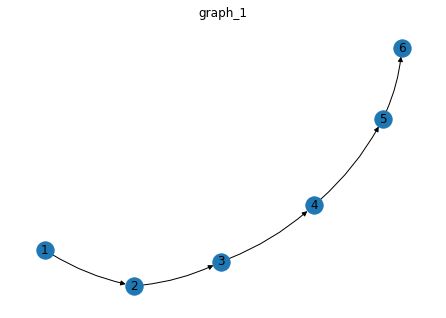

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = graph_1_list
graph_1 = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    graph_1.add_edge(edge[0], edge[1], length = 1)

pos = nx.spring_layout(graph_1)
nx.draw(graph_1, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_1.edges(data=True)])
plt.title('graph_1')
plt.show()

# graph_1_power_node_1

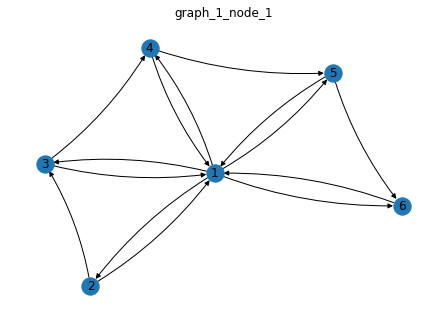

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = graph_1_list_node_1
graph_1_node_1 = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    graph_1_node_1.add_edge(edge[0], edge[1], length = 1)

pos = nx.spring_layout(graph_1_node_1)
nx.draw(graph_1_node_1, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_1_node_1.edges(data=True)])
plt.title('graph_1_node_1')
plt.show()

# graph_2

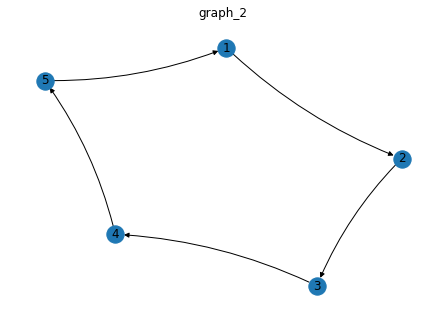

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = graph_2_list
graph_2 = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    graph_2.add_edge(edge[0], edge[1], length = 1)

pos = nx.spring_layout(graph_2)
nx.draw(graph_2, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_2.edges(data=True)])
plt.title('graph_2')
plt.show()

# graph_2_power_node_1

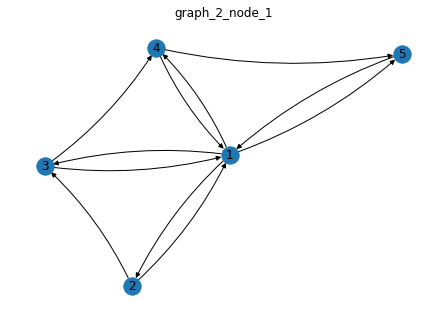

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = graph_2_list_node_1
graph_2_node_1 = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    graph_2_node_1.add_edge(edge[0], edge[1], length = 1)

pos = nx.spring_layout(graph_2_node_1)
nx.draw(graph_2_node_1, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_2_node_1.edges(data=True)])
plt.title('graph_2_node_1')
plt.show()

# graph_3

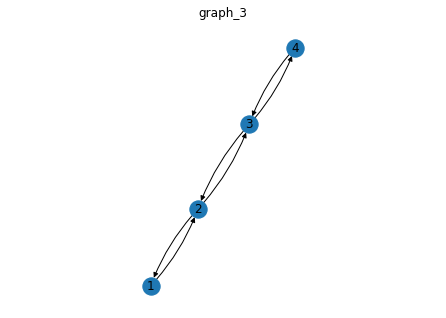

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = graph_3_list
graph_3 = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    graph_3.add_edge(edge[0], edge[1], length = 1)

pos = nx.spring_layout(graph_3)
nx.draw(graph_3, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_3.edges(data=True)])
plt.title('graph_3')
plt.show()

# graph_3_power_node_1

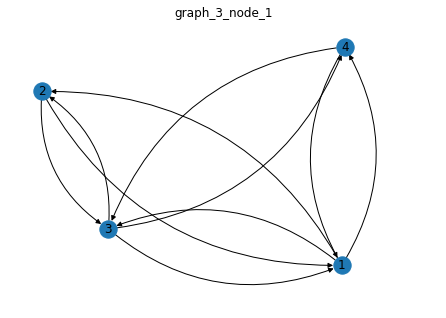

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = graph_3_list_node_1
graph_3_node_1 = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    graph_3_node_1.add_edge(edge[0], edge[1], length = 2)

pos = nx.spring_layout(graph_1)
nx.draw(graph_3_node_1, pos, with_labels=True, connectionstyle='arc3, rad = 0.3')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_3_node_1.edges(data=True)])
plt.title('graph_3_node_1')
plt.show()

# graph_4

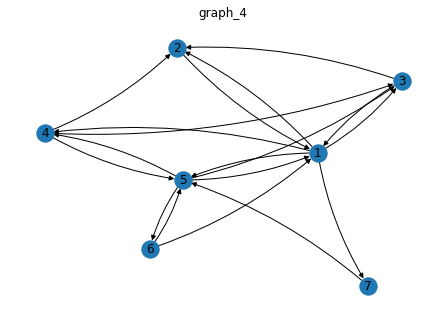

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = graph_4_list
graph_4 = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    graph_4.add_edge(edge[0], edge[1], length = 1)

pos = nx.spring_layout(graph_4)
nx.draw(graph_4, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_4.edges(data=True)])
plt.title('graph_4')
plt.show()

# graph_5

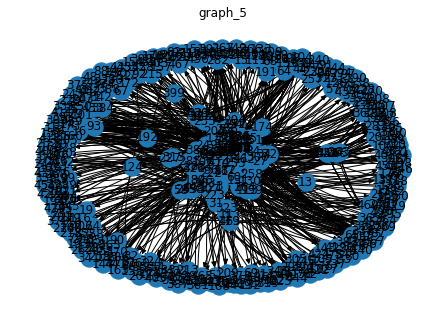

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = graph_5_list
graph_5 = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    graph_5.add_edge(edge[0], edge[1], length = 1)

pos = nx.spring_layout(graph_5)
nx.draw(graph_5, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_5.edges(data=True)])
plt.title('graph_5')
plt.show()

# graph_6

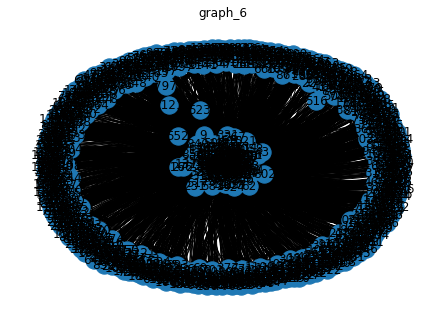

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = graph_6_list
graph_6 = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    graph_6.add_edge(edge[0], edge[1], length = 1)

pos = nx.spring_layout(graph_6)
nx.draw(graph_6, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_6.edges(data=True)])
plt.title('graph_6')
plt.show()

# IBM

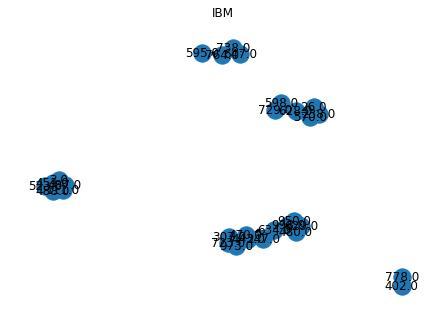

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
want_list = np.array(IBM_list)
graph_IBM = nx.DiGraph() #or G = nx.MultiDiGraph()
for edge in want_list:
    for pos_1 in edge[0]:
        for pos_2 in edge[1]:
            graph_IBM.add_edge(str(pos_1), str(pos_2), length = 1)

pos = nx.spring_layout(graph_IBM)
nx.draw(graph_IBM, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in graph_IBM.edges(data=True)])
plt.title('IBM')
plt.show()